# <center>Prediction Of Prostate Cancer using Machine Learning

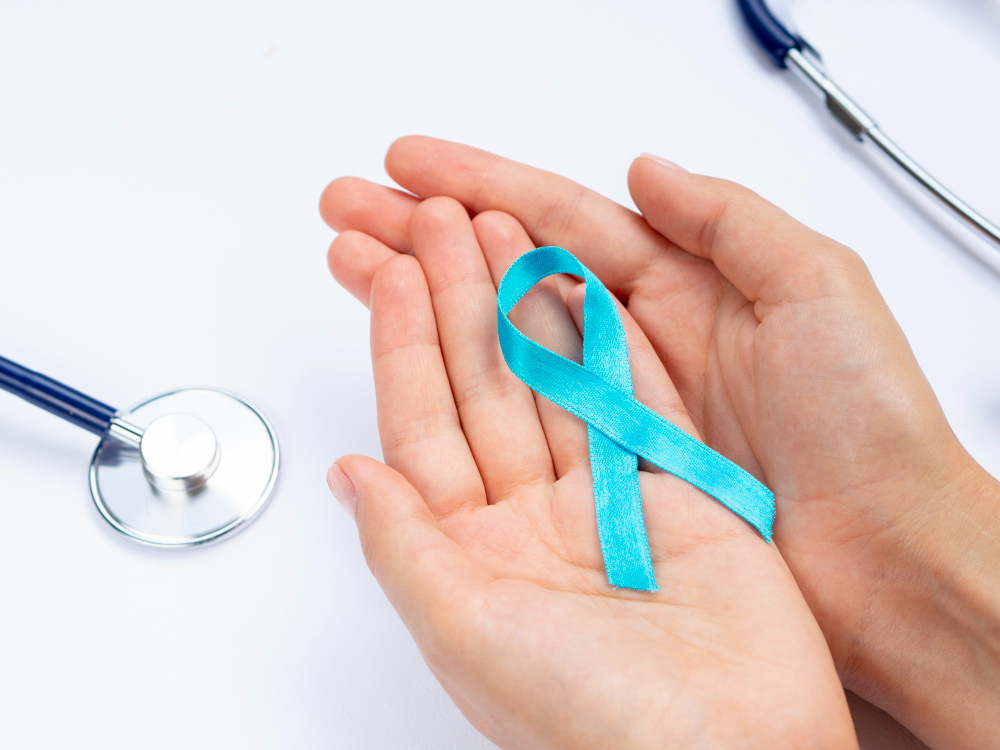

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import roc_curve, auc,accuracy_score,confusion_matrix
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import label_binarize, StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from itertools import cycle

#### Loading the dataset

In [2]:
df = pd.read_csv('./Prostate_Cancer.csv')
df

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
27,28,M,16,24,122,1094,0.094,0.107,0.170,0.057
78,79,M,16,18,144,1245,0.129,0.345,0.291,0.081
29,30,M,11,16,115,955,0.098,0.116,0.174,0.061
82,83,M,10,15,172,1878,0.106,0.267,0.183,0.068
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
5,6,B,25,25,83,477,0.128,0.170,0.209,0.076
51,52,B,19,22,87,572,0.077,0.061,0.135,0.060
39,40,M,10,14,88,559,0.102,0.126,0.172,0.064
10,11,M,24,21,103,798,0.082,0.067,0.153,0.057
64,65,M,16,19,83,499,0.112,0.126,0.191,0.066


In [3]:
df.drop(columns="id",inplace=True)

In [4]:
df.rename(columns={"diagnosis_result":"diagnosis"},inplace=True)

#### Let's reorder the dataset to shift the target column to the right side

In [5]:
df.columns

Index(['diagnosis', 'radius', 'texture', 'perimeter', 'area', 'smoothness',
       'compactness', 'symmetry', 'fractal_dimension'],
      dtype='object')

In [6]:
data=df[['radius', 'texture', 'perimeter', 'area',
       'smoothness', 'compactness', 'symmetry', 'fractal_dimension','diagnosis']]

In [7]:
data

,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension,diagnosis
0,23,12,151,954,0.143,0.278,0.242,0.079,M
1,9,13,133,1326,0.143,0.079,0.181,0.057,B
2,21,27,130,1203,0.125,0.160,0.207,0.060,M
3,14,16,78,386,0.070,0.284,0.260,0.097,M
4,9,19,135,1297,0.141,0.133,0.181,0.059,M
...,...,...,...,...,...,...,...,...,...
95,23,16,132,1264,0.091,0.131,0.210,0.056,M
96,22,14,78,451,0.105,0.071,0.190,0.066,B
97,19,27,62,295,0.102,0.053,0.135,0.069,B
98,21,24,74,413,0.090,0.075,0.162,0.066,B


#### Exploring the data

In [8]:
data.head()

,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension,diagnosis
0,23,12,151,954,0.143,0.278,0.242,0.079,M
1,9,13,133,1326,0.143,0.079,0.181,0.057,B
2,21,27,130,1203,0.125,0.160,0.207,0.060,M
3,14,16,78,386,0.070,0.284,0.260,0.097,M
4,9,19,135,1297,0.141,0.133,0.181,0.059,M


In [9]:
data.tail()

,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension,diagnosis
95,23,16,132,1264,0.091,0.131,0.210,0.056,M
96,22,14,78,451,0.105,0.071,0.190,0.066,B
97,19,27,62,295,0.102,0.053,0.135,0.069,B
98,21,24,74,413,0.090,0.075,0.162,0.066,B
99,16,27,94,643,0.098,0.114,0.188,0.064,M


In [ ]:
data.sample(10)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   radius             100 non-null    int64  
 1   texture            100 non-null    int64  
 2   perimeter          100 non-null    int64  
 3   area               100 non-null    int64  
 4   smoothness         100 non-null    float64
 5   compactness        100 non-null    float64
 6   symmetry           100 non-null    float64
 7   fractal_dimension  100 non-null    float64
 8   diagnosis          100 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 7.2+ KB


In [11]:
data.shape

(100, 9)

In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
radius,100.0,16.85000,4.879094,9.000,12.0000,17.0000,21.000,25.000
texture,100.0,18.23000,5.192954,11.000,14.0000,17.5000,22.250,27.000
perimeter,100.0,96.78000,23.676089,52.000,82.5000,94.0000,114.250,172.000
area,100.0,702.88000,319.710895,202.000,476.7500,644.0000,917.000,1878.000
smoothness,100.0,0.10273,0.014642,0.070,0.0935,0.1020,0.112,0.143
compactness,100.0,0.12670,0.061144,0.038,0.0805,0.1185,0.157,0.345
symmetry,100.0,0.19317,0.030785,0.135,0.1720,0.1900,0.209,0.304
fractal_dimension,100.0,0.06469,0.008151,0.053,0.0590,0.0630,0.069,0.097


#### checking the null percentage

In [13]:
data.isnull().mean()*100

radius               0.0
texture              0.0
perimeter            0.0
area                 0.0
smoothness           0.0
compactness          0.0
symmetry             0.0
fractal_dimension    0.0
diagnosis            0.0
dtype: float64

#### Chceking duplicate values

In [14]:
data.duplicated().mean()*100

0.0

## Explorartory Data Analysis

### Univariate Analysis

#### Histogram 

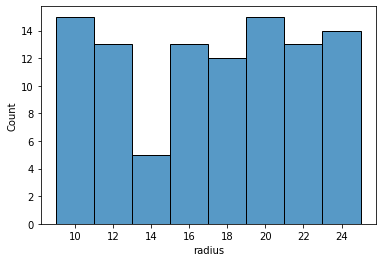

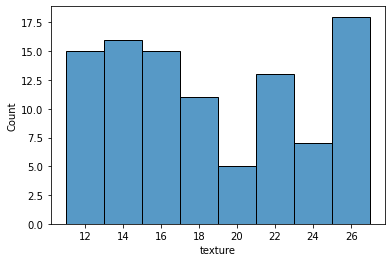

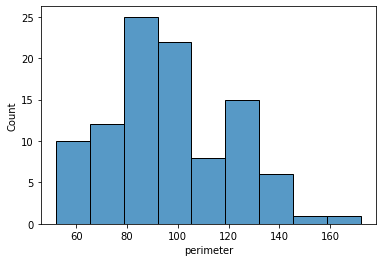

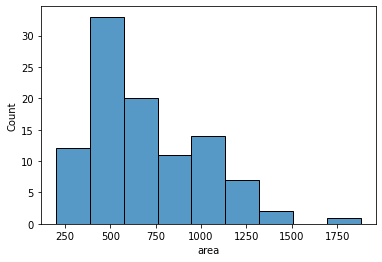

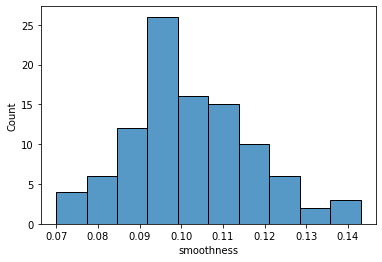

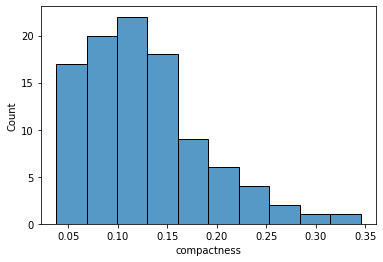

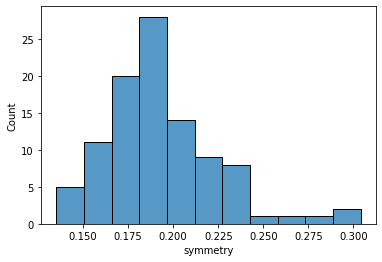

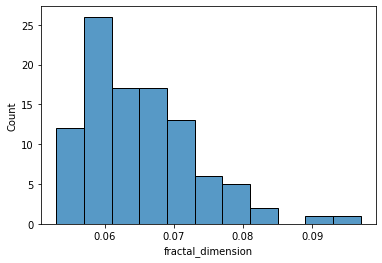

In [15]:
for i in data.columns:
    if data[i].dtype !="object":
        sns.histplot(x=data[i])
        plt.show();

#### Kde Plot

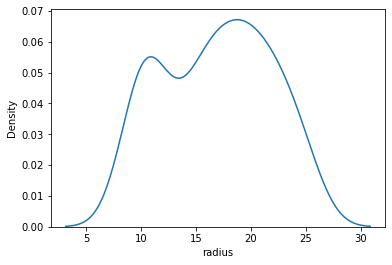

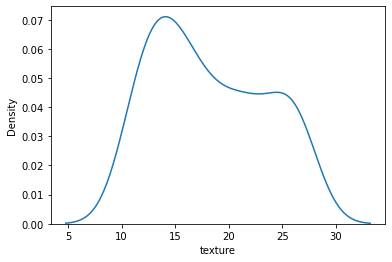

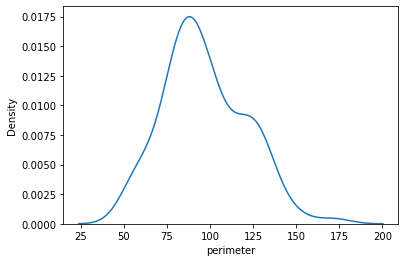

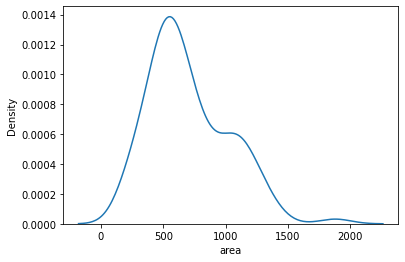

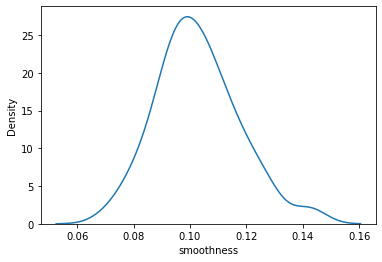

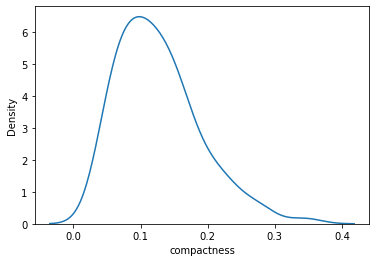

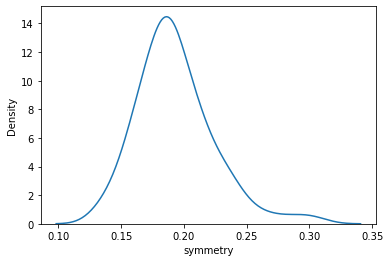

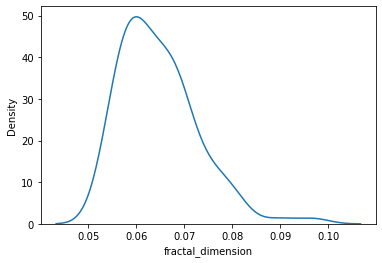

In [16]:
for i in data.columns:
    if data[i].dtype !="object":
        sns.kdeplot(x=data[i])
        plt.show();

#### Box Plot

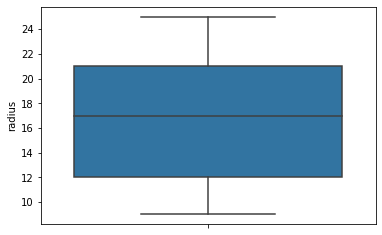

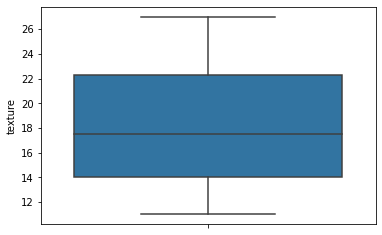

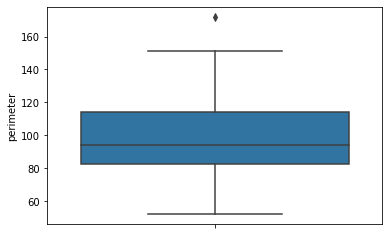

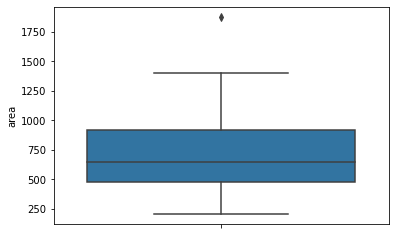

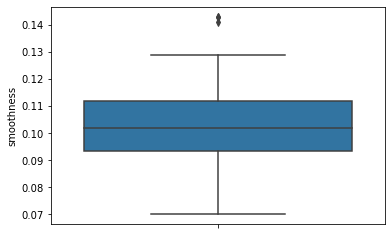

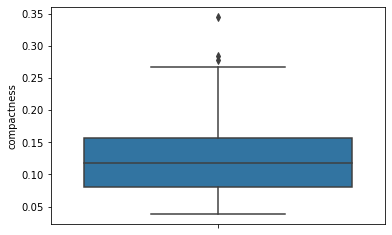

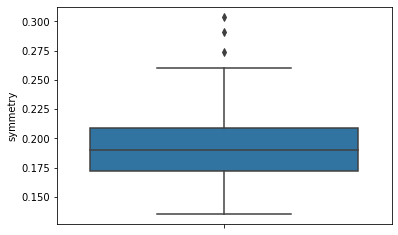

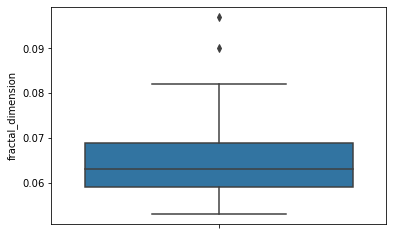

In [17]:
for i in data.columns:
    if data[i].dtype !="object":
        sns.boxplot(y=data[i])
        plt.show();

### Multivariate Analysis

#### Bar Chart

In [18]:
data.columns

Index(['radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness',
       'symmetry', 'fractal_dimension', 'diagnosis'],
      dtype='object')

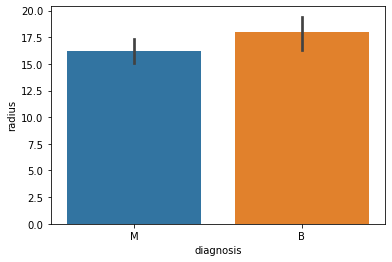

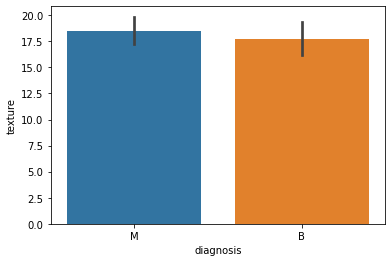

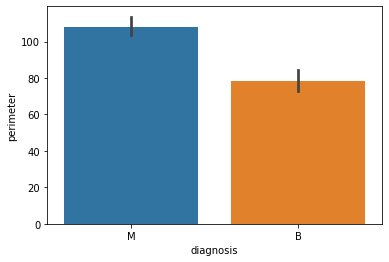

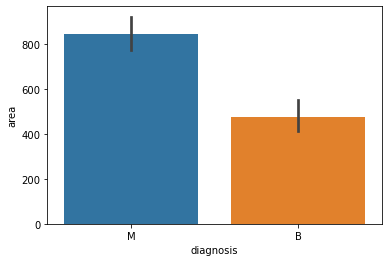

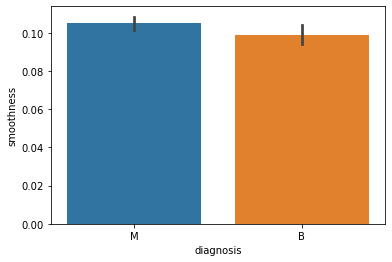

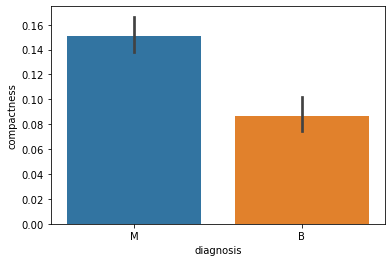

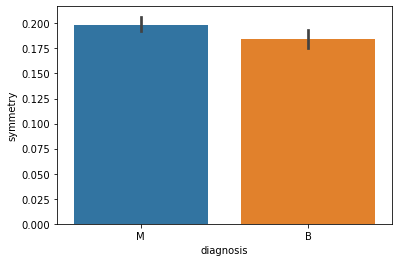

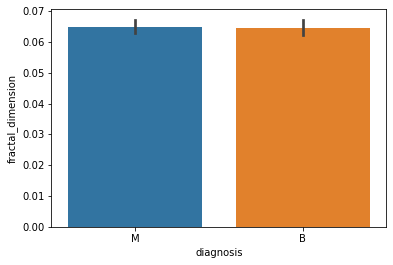

In [19]:
a = ['radius','texture','perimeter','area','smoothness','compactness','symmetry','fractal_dimension']
for i in a:
    sns.barplot(x="diagnosis",y=data[i],data=data);
    plt.show();

#### Pie Chart

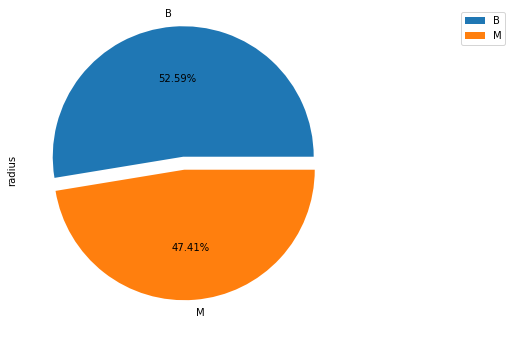

In [36]:
plt.figure(figsize=(14,6))
diagnosis_radius=data.groupby(['diagnosis'])['radius'].mean()
explode=0.1,0
diagnosis_radius.plot.pie(autopct='%1.2f%%',explode=explode)
plt.legend(bbox_to_anchor=(1.5,1))
plt.show()

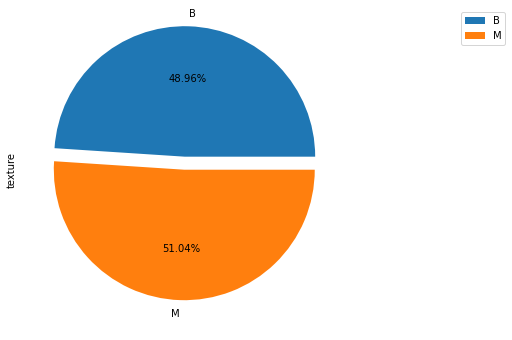

In [37]:
plt.figure(figsize=(14,6))
diagnosis_texture=data.groupby(['diagnosis'])['texture'].mean()
explode=0.1,0
diagnosis_texture.plot.pie(autopct='%1.2f%%',explode=explode)
plt.legend(bbox_to_anchor=(1.5,1))
plt.show()

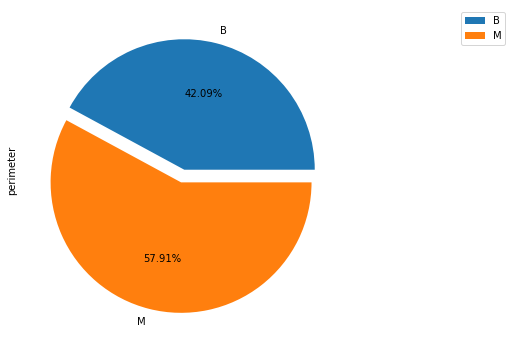

In [38]:
plt.figure(figsize=(14,6))
diagnosis_perimeter=data.groupby(['diagnosis'])['perimeter'].mean()
explode=0,0.1
diagnosis_perimeter.plot.pie(autopct='%1.2f%%',explode=explode)
plt.legend(bbox_to_anchor=(1.5,1))
plt.show()

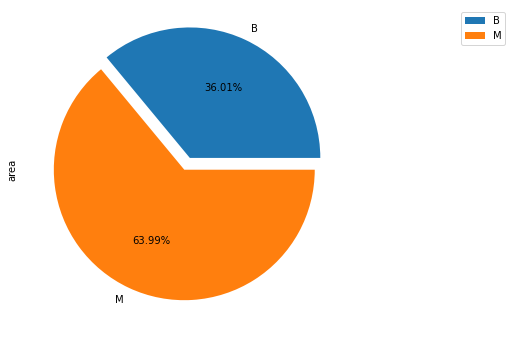

In [39]:
plt.figure(figsize=(14,6))
diagnosis_area=data.groupby(['diagnosis'])['area'].mean()
explode=0.1,0
diagnosis_area.plot.pie(autopct='%1.2f%%',explode=explode)
plt.legend(bbox_to_anchor=(1.5,1))
plt.show()

#### Pair Plot

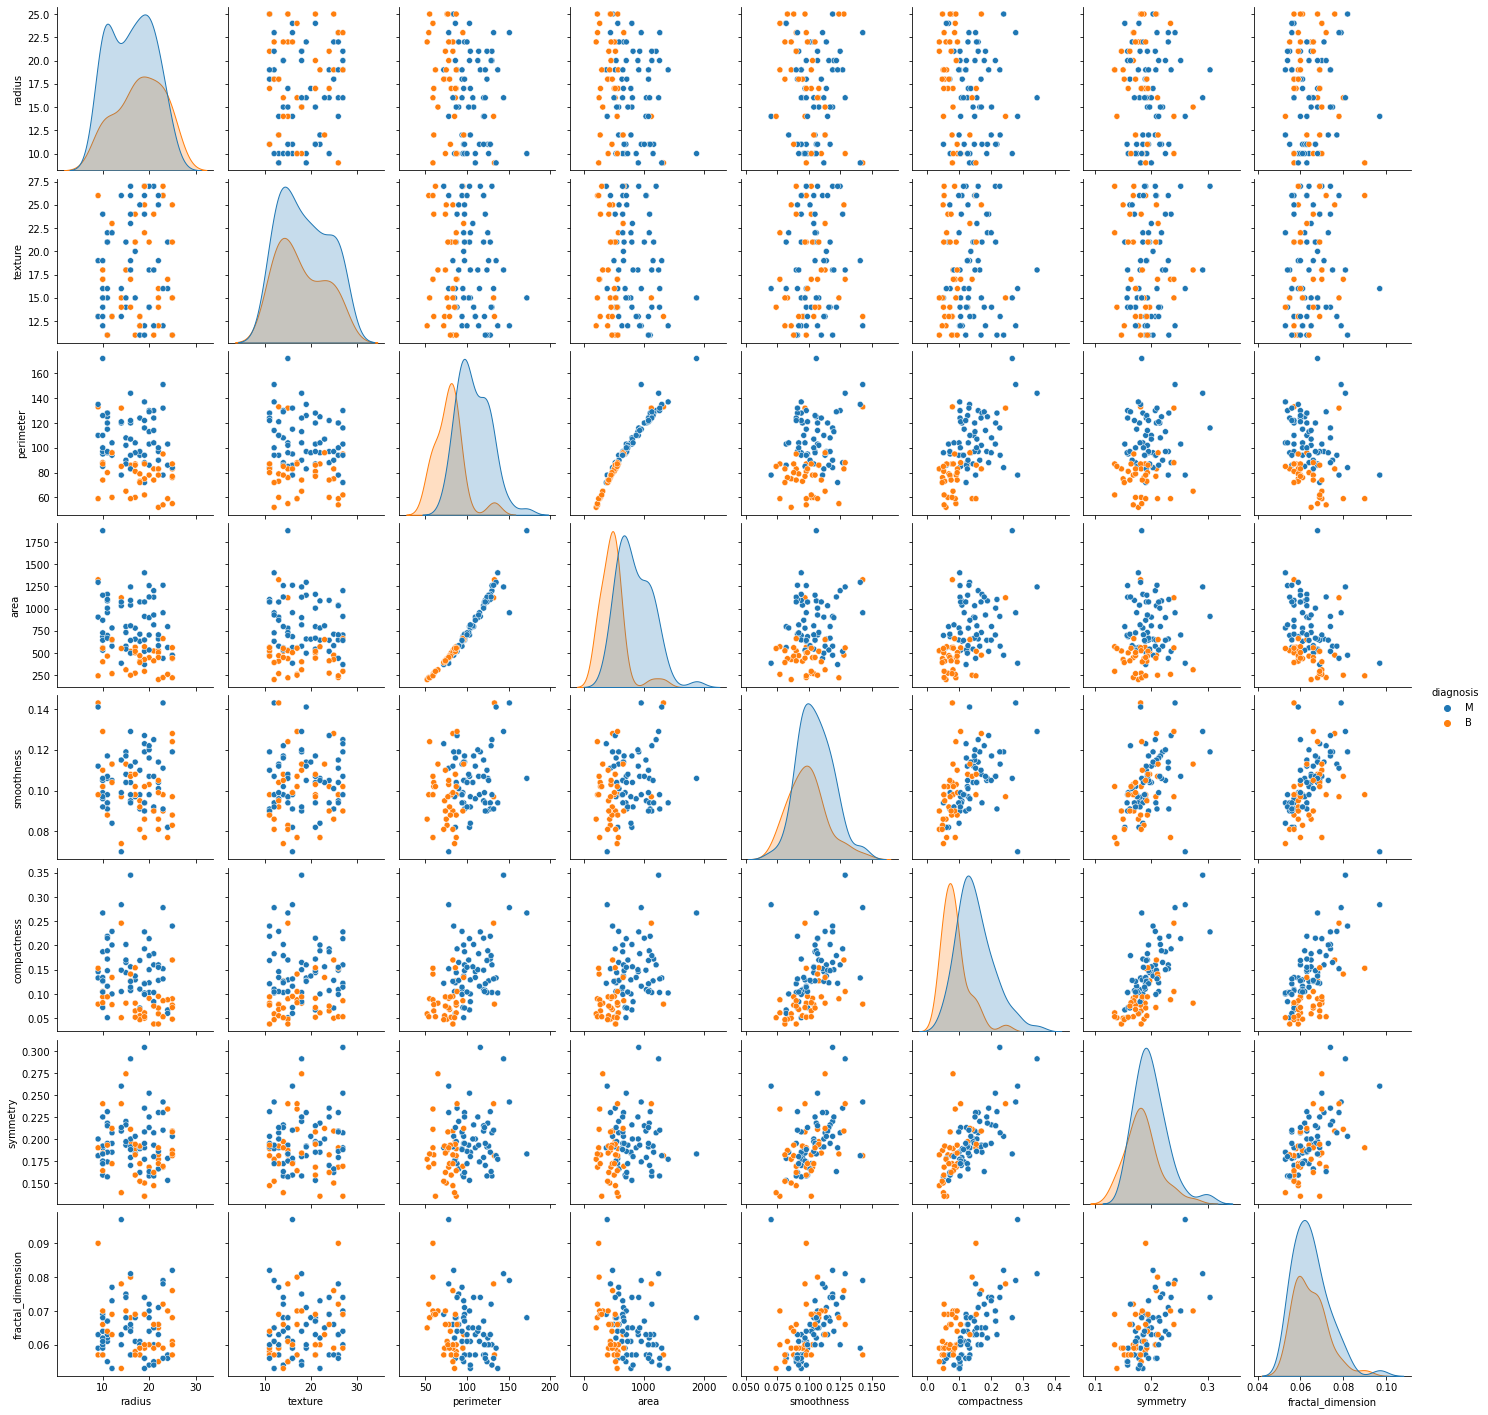

In [29]:
sns.pairplot(data=data,kind="scatter", hue="diagnosis");
plt.show();

#### Label Encoding

In [54]:
le = LabelEncoder()
data["diagnosis"]=le.fit_transform(data["diagnosis"])

#### Scaling

In [55]:
x=data.iloc[:,:-1].values

In [56]:
y=data.iloc[:,-1].values

#### Check whether the data is imbalanced

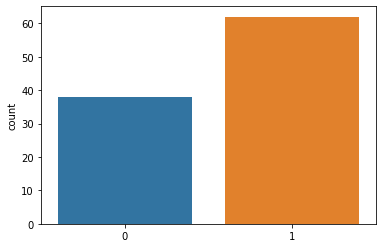

In [57]:
sns.countplot(x=y);

#### We can see that the data is balanced, so we use oversampling

###### Initialize the sampler

In [58]:
over_sampler = RandomOverSampler()

In [59]:
x,y = over_sampler.fit_resample(x,y)

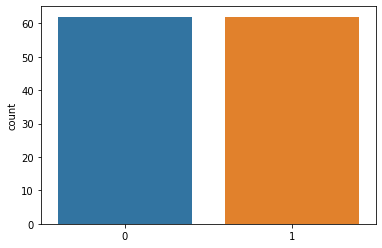

In [60]:
sns.countplot(x=y);

#### we can see now the data is balanced

##### Standarize

In [61]:
sc=StandardScaler()

In [62]:
x=sc.fit_transform(x)

#### Selecting Random Forest classifier

In [63]:
model = RandomForestClassifier()

In [64]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [65]:
model.fit(x_train, y_train)
print("model trained with {}".format(model))
score_train =accuracy_score (y_train, model.predict(x_train))
score_tst = accuracy_score(y_test, model.predict(x_test))
con_train = confusion_matrix(y_train, model.predict(x_train))
con_test = confusion_matrix(y_test, model.predict(x_test))
print("Model accuracy on train is:: ",score_train)
print("Model accuracy on test is:: ", score_tst)
print("confusion_matrix train is:: ", con_train)
print("confusion_matrix test is:: ", con_test)
print("Wrong Predictions made:",(y_test !=model.predict(x_test)).sum(),'/',((y_test == model.predict(x_test)).sum()+(y_test != model.predict(x_test)).sum()))
print("*"*60)

model trained with RandomForestClassifier()
Model accuracy on train is::  1.0
Model accuracy on test is::  0.92
confusion_matrix train is::  [[51  0]
 [ 0 48]]
confusion_matrix test is::  [[11  0]
 [ 2 12]]
Wrong Predictions made: 2 / 25
************************************************************


##### Now we can Compare the actual and predicted value

In [66]:
OUTPUT= pd.DataFrame(zip(y,model.predict(x)), columns=("ACTUAL", "PREDICTION"), dtype = int)
OUTPUT.sample(10)

,ACTUAL,PREDICTION
22,1,1
94,1,1
13,1,1
84,0,0
7,1,1
79,0,0
118,0,0
54,1,1
77,1,1
117,0,0


#### Plotting Confusion Matrix for training and testing

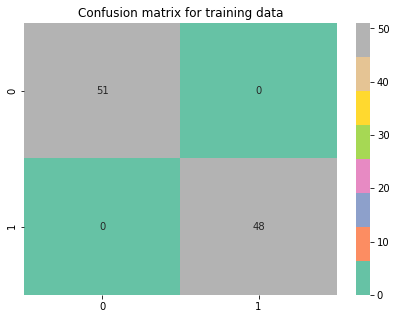

In [75]:
plt.figure(figsize=(7,5))
plt.title("Confusion matrix for training data")
sns.heatmap(con_train, annot=True, cmap='Set2');

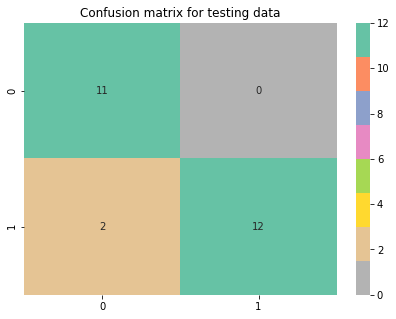

In [74]:
plt.figure(figsize=(7,5))
plt.title("Confusion matrix for testing data")
sns.heatmap(con_test, annot=True, cmap='Set2_r');

### Computing ROC and AUC

Model used is :: RandomForestClassifier()


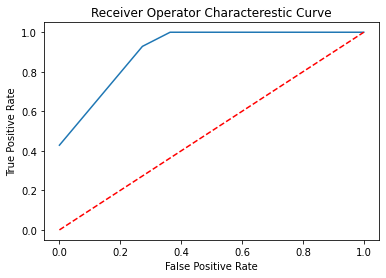

In [76]:
model.fit(x_train,y_train)
probs = model.predict_proba(x_test)
preds = probs[:,1]
fpr,tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr,tpr)
print("Model used is ::",model)
sns.lineplot(x=fpr,y=tpr,ci=None)
plt.plot([0,1],[0,1],color="Red",linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operator Characterestic Curve')
plt.show();

Based on the analysis of Prostate Cancer Classification dataset using Random Forest Classifier we were able to achieve a training accuracy of 100% and testing accuracy of 92% in predicting the diabetes.ROC Curve is also drawn.This project demonstrates the application of machine learning algorithms to real world problems and how they can be used to make data-driven decisions.By using machine learning to classify diabetes we can potentially improve the accuracy and efficiency of prediction of Prostate Cancer leading to better outcome for patients.